In [1]:
%pip install opencv-python
%pip install numpy
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 196.9 kB/s eta 0:00:0000:0100:07
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 78.0 kB/s eta 0:00:00a 0:00:02m

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp311-cp311-macosx_10_9_universal2.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp31

# Import Libraries

In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Input Image


In [19]:
# Load grayscale image
image = cv2.imread('image.jpeg', cv2.IMREAD_GRAYSCALE)

# Make output directory
os.makedirs("results", exist_ok=True)

# 1) Reduce Intensity Level


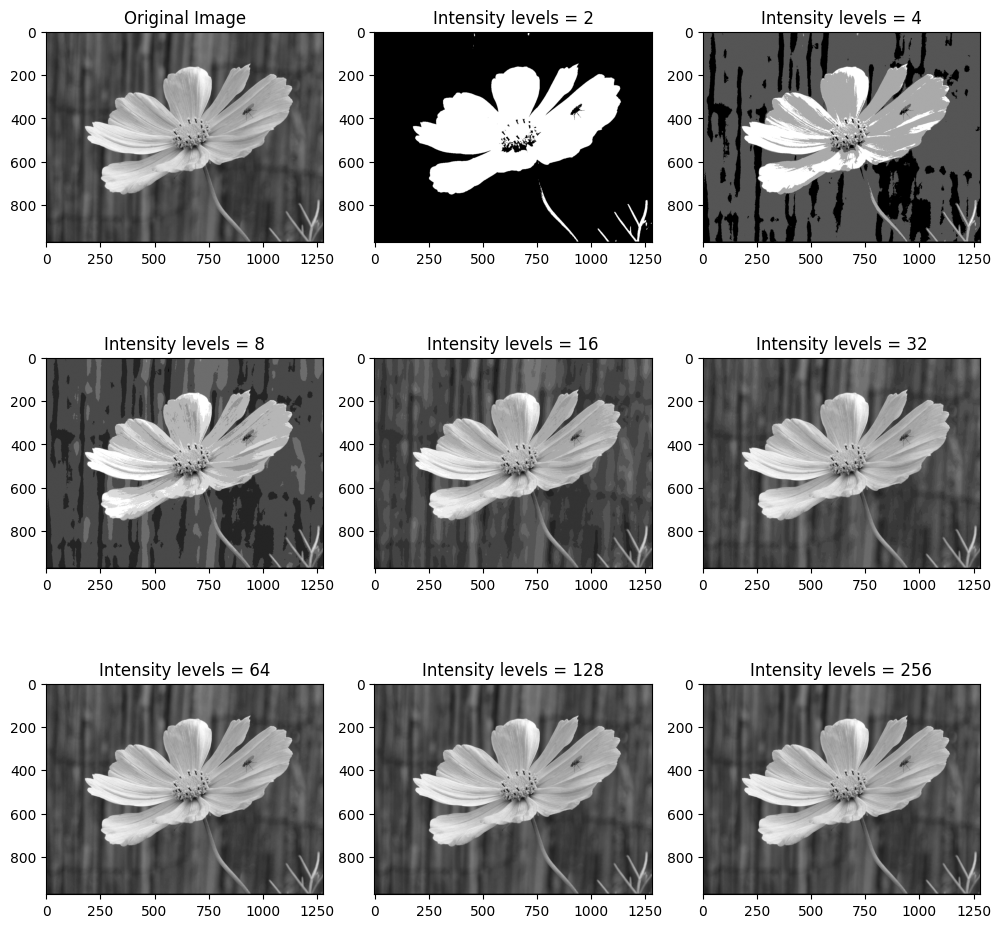

In [40]:
# Function to reduce intensity levels
def reduce_intensity_levels(image, levels):
    factor = 256 // levels
    reduced_image = (image // factor) * factor
    return reduced_image

# Levels to apply
levels_list = [2, 4, 8, 16, 32, 64, 128, 256]

# Prepare subplots (1 for original + 8 for reduced images)
fig, arr = plt.subplots(3, 3, figsize=(10, 10))
arr = arr.flatten()

# Show original
arr[0].imshow(image, cmap='gray')
arr[0].set_title('Original Image')
arr[0].axis('on')

# Apply and show each reduced intensity image
for i, lvl in enumerate(levels_list):
    reduced = reduce_intensity_levels(image, lvl)
    cv2.imwrite(f'results/reduced_{lvl}_levels.jpg', reduced)

    arr[i + 1].imshow(reduced, cmap='gray')
    arr[i + 1].set_title(f'Intensity levels = {lvl}')
    arr[i + 1].axis('on')

plt.tight_layout()
plt.show()

# 2) Spatial Averaging (Smoothing)


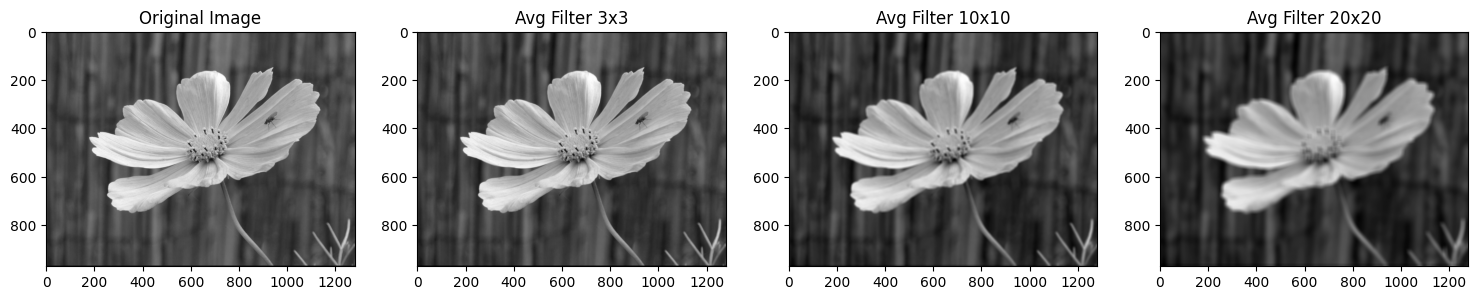

In [33]:
def average_filter(image, ksize):
    return cv2.blur(image, (ksize, ksize))

ksize_list = [3, 10, 20]
fig, arr = plt.subplots(1, 4, figsize=(15, 5))
arr[0].imshow(image, cmap='gray')
arr[0].set_title('Original Image')
arr[0].axis('on')

for i, k in enumerate(ksize_list):
    avg = average_filter(image, k)
    cv2.imwrite(f'results/avg_{k}x{k}.jpg', avg)
    arr[i + 1].imshow(avg, cmap='gray')
    arr[i + 1].set_title(f'Avg Filter {k}x{k}')
    arr[i + 1].axis('on')

plt.tight_layout()
plt.show()

# 3) Image Rotation


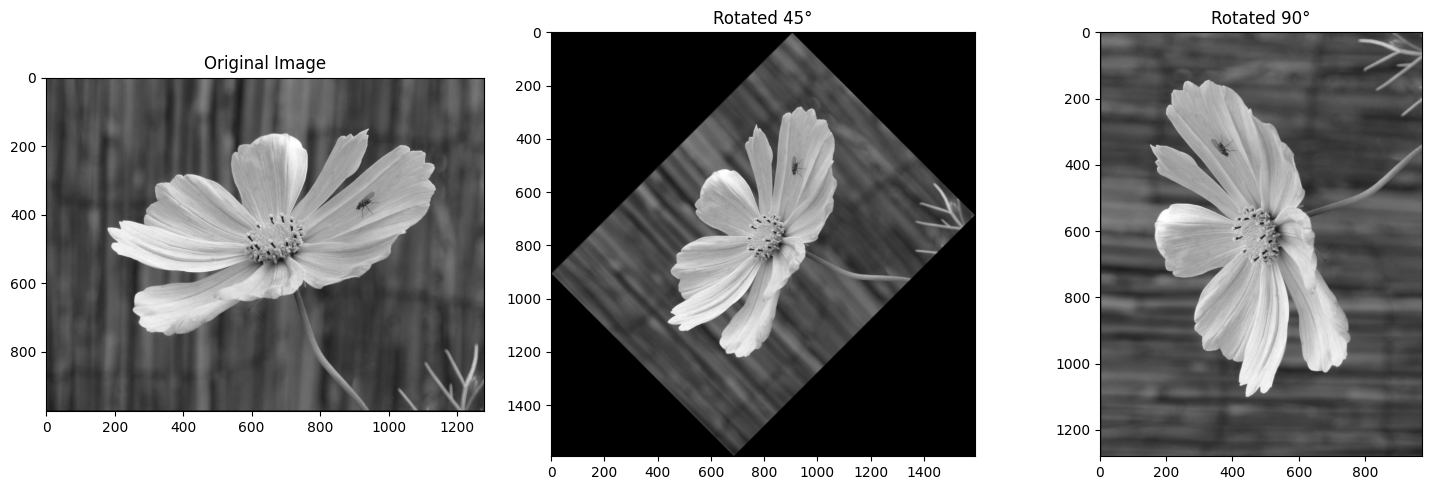

In [32]:
def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    cos = np.abs(matrix[0, 0])
    sin = np.abs(matrix[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    matrix[0, 2] += (nW / 2) - center[0]
    matrix[1, 2] += (nH / 2) - center[1]
    rotated = cv2.warpAffine(image, matrix, (nW, nH))
    return rotated

angle_list = [45, 90]
fig, arr = plt.subplots(1, 3, figsize=(15, 5))
arr[0].imshow(image, cmap='gray')
arr[0].set_title('Original Image')
arr[0].axis('on')

for i, angle in enumerate(angle_list):
    rot = rotate_image(image, angle)
    cv2.imwrite(f'results/rotated_{angle}.jpg', rot)
    arr[i + 1].imshow(rot, cmap='gray')
    arr[i + 1].set_title(f'Rotated {angle}°')
    arr[i + 1].axis('on')

plt.tight_layout()
plt.show()

# 4) Reduce Resolution via Block Averaging


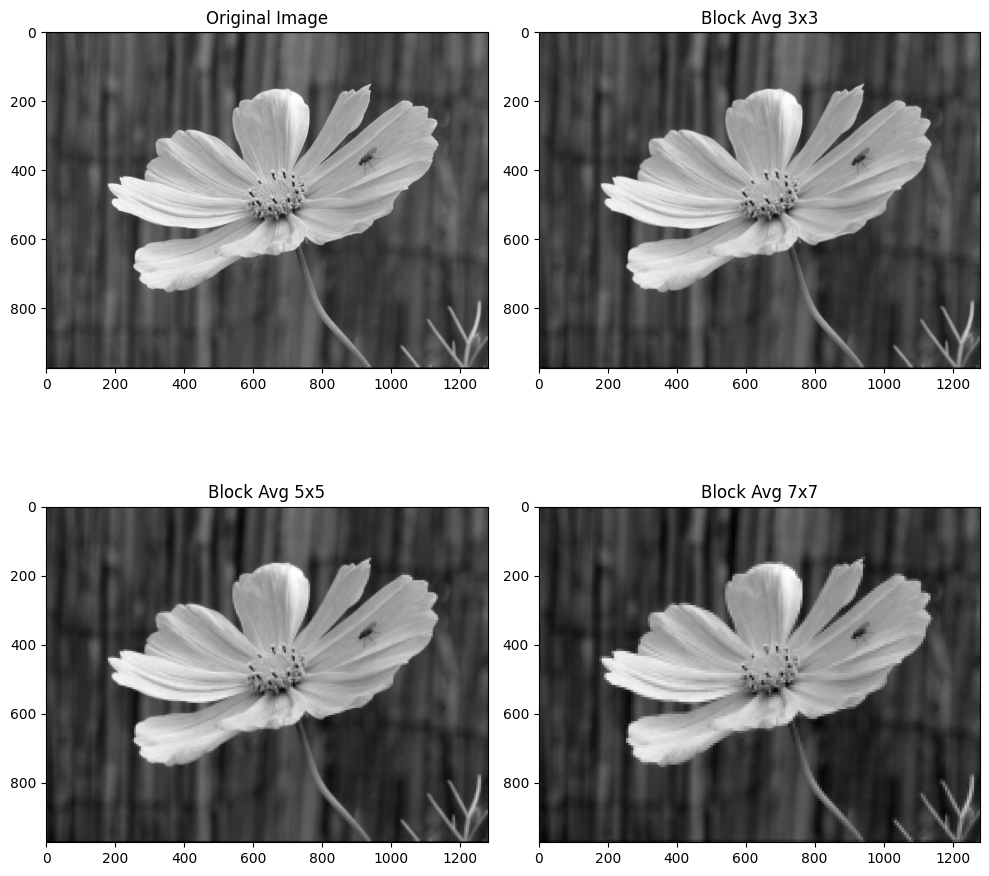

In [31]:
def block_average(image, block_size):
    h, w = image.shape
    reduced_image = np.copy(image)
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            y_end = min(y + block_size, h)
            x_end = min(x + block_size, w)
            block = image[y:y_end, x:x_end]
            avg_val = block.mean().astype(np.uint8)
            reduced_image[y:y_end, x:x_end] = avg_val
    return reduced_image

block_list = [3, 5, 7]
fig, arr = plt.subplots(2, 2, figsize=(10, 10))
arr = arr.flatten()
arr[0].imshow(image, cmap='gray')
arr[0].set_title('Original Image')
arr[0].axis('on')

for i, b in enumerate(block_list):
    block = block_average(image, b)
    cv2.imwrite(f'results/block_{b}x{b}.jpg', block)
    arr[i + 1].imshow(block, cmap='gray')
    arr[i + 1].set_title(f'Block Avg {b}x{b}')
    arr[i + 1].axis('on')

plt.tight_layout()
plt.show()